# Implementing Perceptron Learning Algorithm(PLA)

In [1]:
from random import choices
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Generating the dataset {-}

In [2]:
class DatasetGeneration:
    def __init__(self, k, m, epsilon):
        mu, sigma = 0, 1
        self.k = k
        self.m = m
        self.epsilon = epsilon
        count = 0
        self.X = []
        self.Y = []
        while count < m:
            self.Z = []
            for _ in range(k):
                # Selecting a single point according to normal distribution and appending it to list Z.
                self.Z.append(np.random.normal(mu, sigma))   
            norm_Z = np.linalg.norm(self.Z)
            curr = self.Z/norm_Z
            
            # Discarding any point which does not satisfy the threshold.
            if abs(curr[-1]) >= self.epsilon:
                # Dividing the dataset and setting the label value.
                if curr[-1] >= self.epsilon:
                    self.Y.append(1)
                    self.X.append(curr)
                elif curr[-1] <= -self.epsilon:
                    self.Y.append(-1)
                    self.X.append(curr)
                    
                # Count to make sure that we have m datapoints.
                count += 1
                
class Perceptron:
    def __init__(self, iterations=100):
        self.iterations = iterations # Max iterations after which PLA would stop.
        self.weights, self.bias = None, 0 # Setting the bias value to 0 initially
    
    def fit(self, X, y):
        count = 0
        datapoints, features = X.shape
        self.weights = np.zeros(features) # Setting the weight vector to 0.
        for i in range(self.iterations):
            '''
            A flag so that when there are no more updates for weight vector, i.e., the PLA has converged, we can stop 
            the iterations instead of going to till the max iterations specified. Also, this helps us get the number 
            of iterations it took PLA to converge.
            '''
            flag = 0
            for x_datapoint, label in zip(X, y):
                value = self.predict(x_datapoint)
                # If the returned value is not same as the label, we will update the weights.
                if value != label:
                    flag = 1
                    self.weights = self.weights + (label * x_datapoint)
                    self.bias = self.bias + label
                    count += 1
                        
            # Returns the number of iterations and ends the PLA.
            if flag == 0:
                return count
            
    def predict(self, x_datapoint):
        return 1 if (np.dot(self.weights, x_datapoint) + self.bias) >= 0 else -1
        

## Changing m values

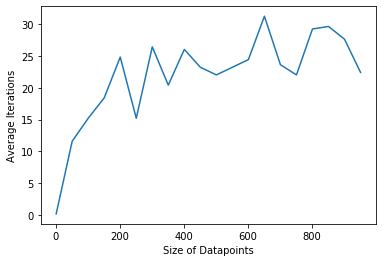

In [3]:
x_axis, iterations = [], []
m_value = 1

while m_value < 1000:
    count = 0
    # Averaging over 5 iterations
    for _ in range(5):
        # Geneating the data, splitting it and fitting a Perceptron on that data.
        data = DatasetGeneration(5, m_value, 0.1)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        count += result
        
    x_axis.append(m_value)
    
    # Averaging the iterations and adding it to the list.
    iterations.append(count/5)
    m_value += 50

plt.plot(x_axis, iterations)
plt.xlabel("Size of Datapoints")
plt.ylabel("Average Iterations")
plt.show()

Results

From the graph, we can see that as we increase the datapoints, the iterations increase. This is because the algorithm has more data to look and adjust the weights accordingly.

## Changing k values

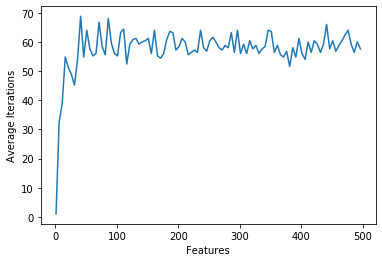

In [5]:
x_axis, iterations = [], []

for k_value in range(1,500,5):
    count = 0
    
    # Averaging over 5 iterations.
    for _ in range(5):
        # Geneating the data, splitting it and fitting a Perceptron on that data.
        data = DatasetGeneration(k_value, 100, 0.05)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        
        count += result
        
    x_axis.append(k_value)
    # Averaging the iterations and adding it to the list.
    iterations.append(count/5)
    
plt.plot(x_axis, iterations)
plt.xlabel("Features")
plt.ylabel("Average Iterations")
plt.show()

Results

There is no pattern that we can see from the graph though initially from k = 1 to k = 30 or 40, the number of iterations were less but after that, it was just fluctuating in some small range. This proves the fact that the convergence of PLA does not depend on the number of features. 

## Changing epsilon values

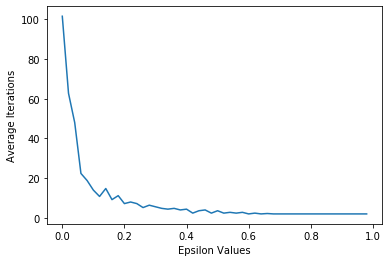

In [6]:
it, iterations = [], []
e_value = 0.0
while e_value < 1:
    count = 0
    for _ in range(5):
        data = DatasetGeneration(5, 100, e_value)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        if result == None:
            continue
        else:
            count += result
    it.append(e_value)
    iterations.append(count/5)
    e_value += 0.02

plt.plot(it, iterations)
plt.xlabel("Epsilon Values")
plt.ylabel("Average Iterations")
plt.show()

Results

If we think in terms of data separation with respect to epsilon values, we can understand the data separation in terms of 2 hemisphers. So as the epsilon value increases, the separation increases. As a result, even if one datapoint from that is classified correctly, more and more datapoints would be correctly classified and hence, the decrease in the average number of iterations. Or in other words, we have more hypotheses space as we increase epsilon which results in finding the separator quickly as the convergence for PLA depends on the margin of separation.

## Bonus

### a.) {-}

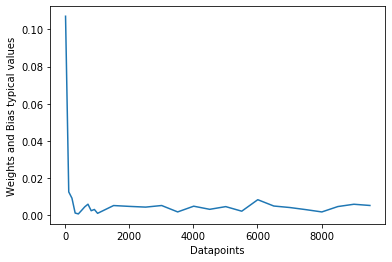

In [7]:
x_axis, y_axis = [], []
m_value, k_value, e_value, max_iterations = 10, 5, 0.1, 3
w_star, b_star = [0 for _ in range (k_value-1)], 0
w_star.append(1)
w_star = np.array(w_star)

while m_value < 10000:
    curr_m_weight, curr_m_bias = [], []
    for _ in range(max_iterations):
        data = DatasetGeneration(k_value, m_value, e_value)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        curr_m_weight.append(list(a.weights))
        curr_m_bias.append(a.bias)
    
    # Averaging the bias and weight values.
    average_bias = np.array(curr_m_bias).mean(axis=0)
    average_weight = np.array(curr_m_weight).mean(axis=0)
    
    # This is the normalization that was mentioned in the announcement. 
    additional_division = np.sqrt(((np.linalg.norm(average_weight))**2) + (average_bias**2))
    
    # Changing the bias and weight according to the normalization that we calculated.
    modified_bias = average_bias / additional_division
    modified_weight = average_weight / additional_division
    
    # Subtracting the "ideal" weights with the "average" weights.
    sub = np.subtract(w_star, modified_weight)
    
    # Checking the difference(distance) between the two weight vectors and the bias value.
    final_checking = (np.linalg.norm(sub))**2 + ((b_star - modified_bias) **2)
    
    x_axis.append(m_value)
    y_axis.append(final_checking)
    
    if m_value < 1000:
        m_value += 100
    else:
        m_value += 500
        
plt.plot(x_axis, y_axis)
plt.xlabel("Datapoints")
plt.ylabel("Weights and Bias typical values")
plt.show()

Results

As we have more datapoints, the PLA becomes efficient and hence, the difference between the "average" perceptron generated and the "ideal" perceptrong is small.

### b.) {-}

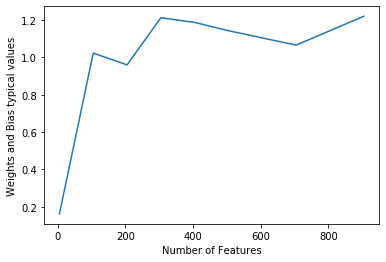

In [8]:
x_axis, y_axis = [], []
m_value, k_value, e_value, max_iterations = 10, 5, 0.1, 3

while k_value < 1000:
    curr_m_weight, curr_m_bias = [], []
    w_star, b_star = [0 for _ in range (k_value-1)], 0
    w_star.append(1)
    w_star = np.array(w_star)
    for _ in range(max_iterations):
        data = DatasetGeneration(k_value, m_value, e_value)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        curr_m_weight.append(list(a.weights))
        curr_m_bias.append(a.bias)
        
    # Averaging the bias and weight values.
    average_bias = np.array(curr_m_bias).mean(axis=0)
    average_weight = np.array(curr_m_weight).mean(axis=0)
    
    # This is the normalization that was mentioned in the announcement. 
    additional_division = np.sqrt(((np.linalg.norm(average_weight))**2) + (average_bias**2))
    
    # Changing the bias and weight according to the normalization that we calculated.
    modified_bias = average_bias / additional_division
    modified_weight = average_weight / additional_division
    
    # Subtracting the "ideal" weights with the "average" weights.
    sub = np.subtract(w_star, modified_weight)
    
    # Checking the difference(distance) between the two weight vectors and the bias value.
    final_checking = (np.linalg.norm(sub))**2 + ((b_star - modified_bias) **2)
    
    x_axis.append(k_value)
    y_axis.append(final_checking)
    
    if k_value < 500:
        k_value += 100
    else:
        k_value += 200
plt.plot(x_axis, y_axis)
plt.xlabel("Number of Features")
plt.ylabel("Weights and Bias typical values")
plt.show()

Results

The result we got is comprehensible as if we increase the number of features, the PLA has more options to choose to update the weights. As a result, there is a large probability that the weights and bias generated is different from the ideal perceptron. 

### c.) {-}

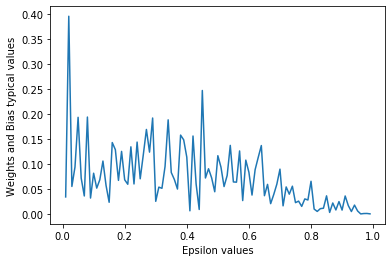

In [9]:
x_axis, y_axis = [], []
m_value, k_value, e_value, max_iterations = 10, 5, 0.01, 5
w_star, b_star = [0 for _ in range (k_value-1)], 0
w_star.append(1)
w_star = np.array(w_star)

while e_value < 1:
    curr_m_weight, curr_m_bias = [], []
    for _ in range(max_iterations):
        data = DatasetGeneration(k_value, m_value, e_value)
        X, y = np.array(data.X), np.array(data.Y)
        a = Perceptron()
        result = a.fit(X, y)
        curr_m_weight.append(list(a.weights))
        curr_m_bias.append(a.bias)
    
    # Averaging the bias and weight values.
    average_bias = np.array(curr_m_bias).mean(axis=0)
    average_weight = np.array(curr_m_weight).mean(axis=0)
    
    # This is the normalization that was mentioned in the announcement. 
    additional_division = np.sqrt(((np.linalg.norm(average_weight))**2) + (average_bias**2))
    
    # Changing the bias and weight according to the normalization that we calculated.
    modified_bias = average_bias / additional_division
    modified_weight = average_weight / additional_division
    
    # Subtracting the "ideal" weights with the "average" weights.
    sub = np.subtract(w_star, modified_weight)
    
    # Checking the difference(distance) between the two weight vectors and the bias value.
    final_checking = (np.linalg.norm(sub))**2 + ((b_star - modified_bias) **2)
    
    x_axis.append(e_value)
    y_axis.append(final_checking)
    
    e_value += 0.01
    
plt.plot(x_axis, y_axis)
plt.xlabel("Epsilon values")
plt.ylabel("Weights and Bias typical values")
plt.show()

Results

The value of difference between the ideal and average perceptron is also very small. Also, for most part, the graph is fluctuating between some values after finally going down.